In [1]:
import sys
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

import Utility as ut
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cycle selection

In [2]:
cycleZ = pd.read_csv("../Data/Chickens data/WithMacro/CycleZ-Clean.csv")
cycleZ = cycleZ.drop(columns=["Feed","Water"])

cycleA = pd.read_csv("../Data/Chickens data/WithMacro/CycleA-Clean.csv")
cycleA = cycleA.drop(columns=["Feed","Water"])
cycleA = cycleA.drop(range(len(cycleZ), len(cycleA)))

cycleB = pd.read_csv("../Data/Chickens data/WithMacro/CycleB-Clean.csv")
cycleB = cycleB.drop(columns=["Feed","Water"])
cycleB = cycleB.drop(range(len(cycleZ), len(cycleB)))

cycleX1 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_1-Clean.csv")
cycleX1['DeathPerc'] = cycleX1['DeathPerc']

## Cycle comparison function

In [3]:
def compareDifferentCycles(dataSets, attribute, legend):
    '''
    Function to compare two cycles attributes or more
    '''
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Period')
    ax.set_ylabel(attribute)
    fig.set_figwidth(20)
    
    for idx, dataSet in enumerate(dataSets):
        # remove columns with informations that could not be plot
        dataSet = dataSet.drop(columns=["Arrival Chickens Date","Date of Selling","Date of Laid"])
        # choose only the enteresting attribute
        dataSet = dataSet[attribute]
        
        window = 30
        avarageData = []
        nparray = np.array(dataSet)
        for i in range(len(nparray) - window + 1):
            avarageData.append(np.mean(nparray[i:i+window]))
        dataSet = avarageData
        ax.plot(dataSet, label=legend[idx])
        
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend(legend)

## Variables that affected the cycles

In [4]:

cycles = []
cycles.append(cycleZ)
cycles.append(cycleB)
cycles.append(cycleA)
cycles.append(cycleX1)

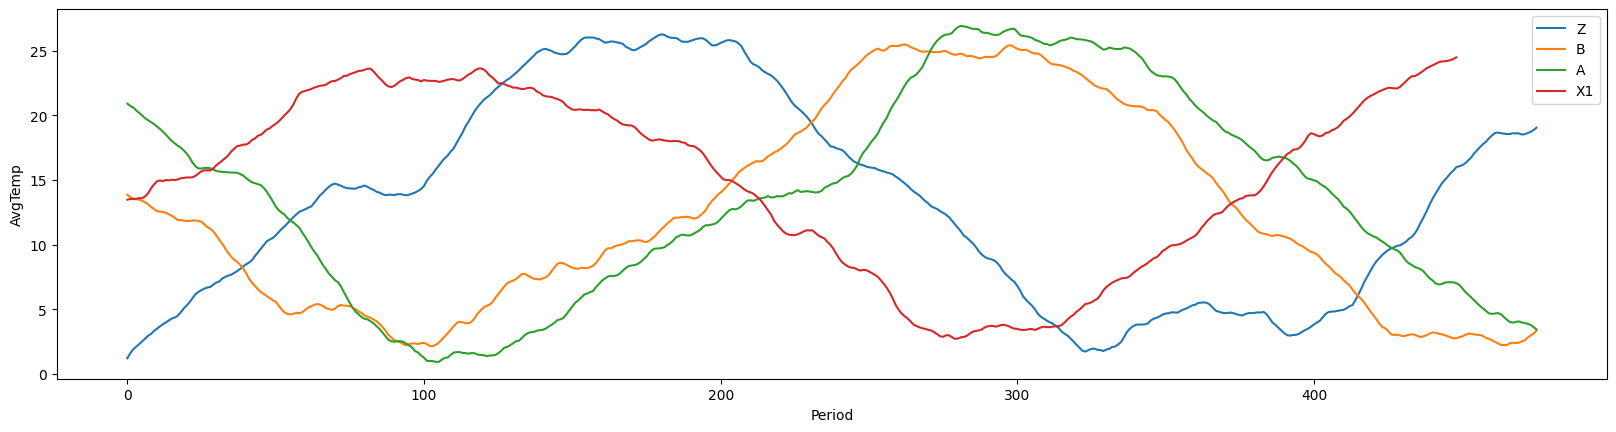

In [5]:
compareDifferentCycles(cycles, 'AvgTemp', ['Z', 'B', 'A', 'X1'])

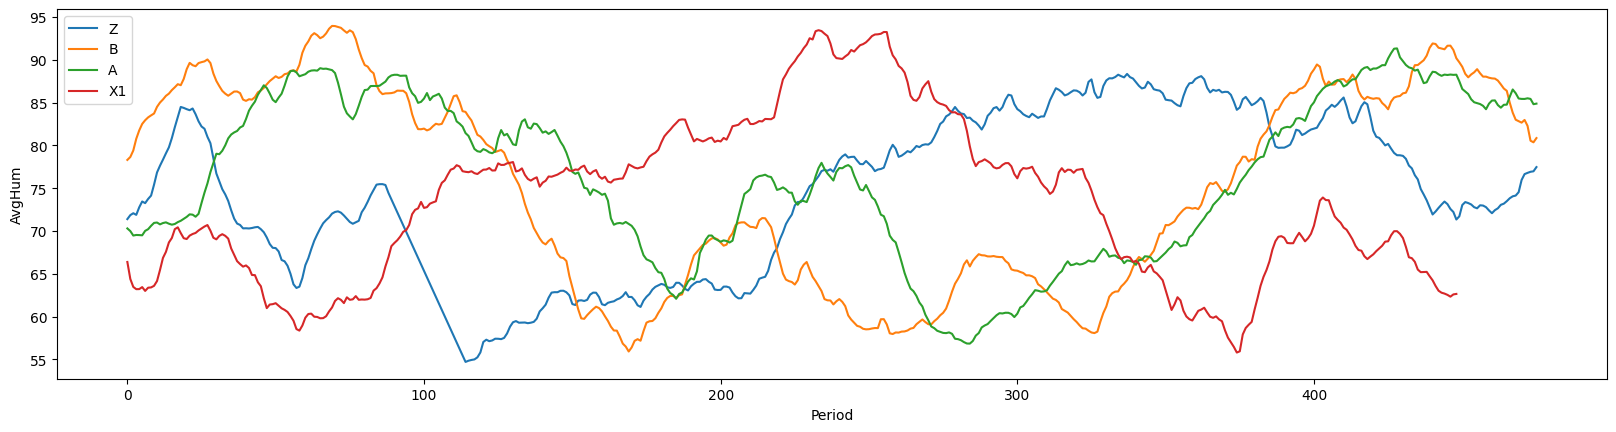

In [6]:
compareDifferentCycles(cycles, 'AvgHum', ['Z', 'B', 'A', 'X1'])

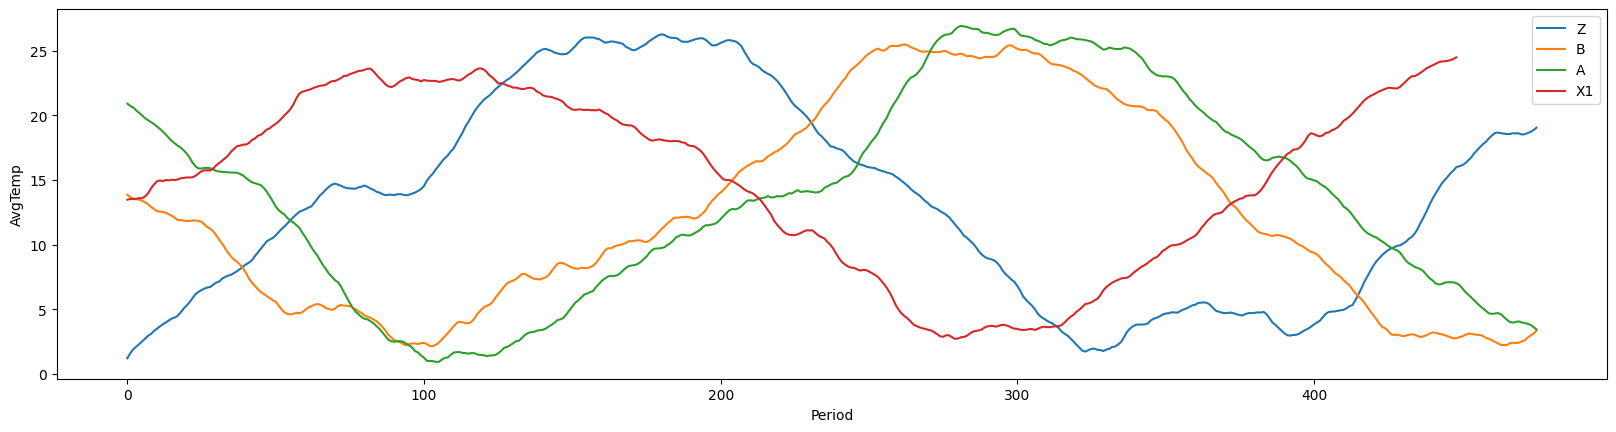

In [7]:
compareDifferentCycles(cycles, 'AvgTemp', ['Z', 'B', 'A', 'X1'])

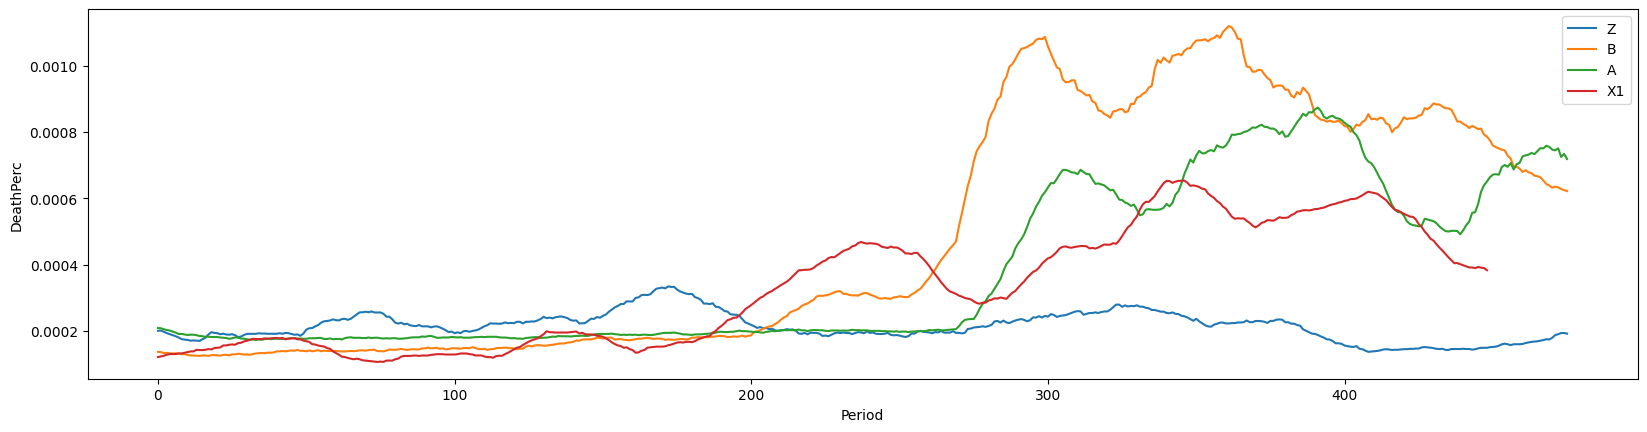

In [8]:
compareDifferentCycles(cycles, 'DeathPerc', ['Z', 'B', 'A', 'X1'])

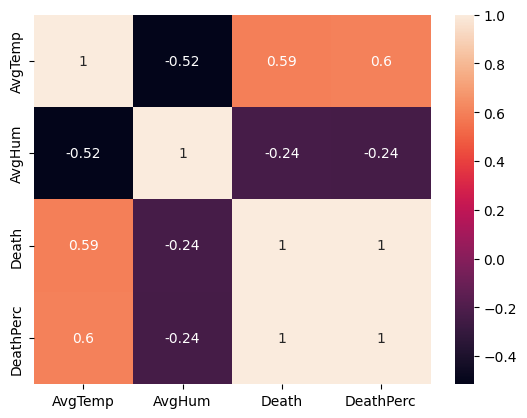

In [18]:
sns.heatmap(cycleA[['AvgTemp', 'AvgHum', 'Death', 'DeathPerc']].drop(range(0,100)).drop(range(350, len(cycleA))).corr(), annot=True)
plt.show()

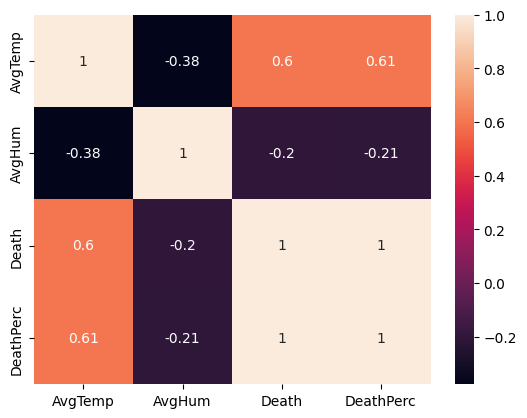

In [19]:
sns.heatmap(cycleB[['AvgTemp', 'AvgHum', 'Death', 'DeathPerc']].drop(range(0,100)).drop(range(300, len(cycleB))).corr(), annot=True)
plt.show()

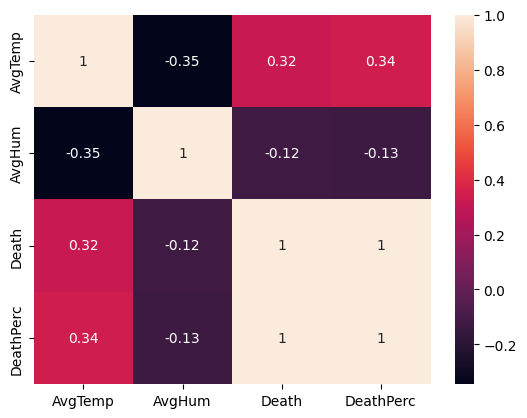

In [20]:
sns.heatmap(cycleZ[['AvgTemp', 'AvgHum', 'Death', 'DeathPerc']].drop(range(200,len(cycleZ))).corr(), annot=True)
plt.show()

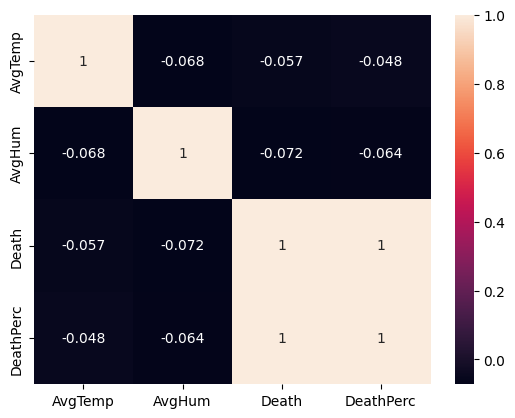

In [21]:
sns.heatmap(cycleX1[['AvgTemp', 'AvgHum', 'Death', 'DeathPerc']].drop(range(200,len(cycleX1))).corr(), annot=True)
plt.show()

## Calculating how better is cycle Z than cycles A and B
The calcualtion is based on the number of eggs produced.

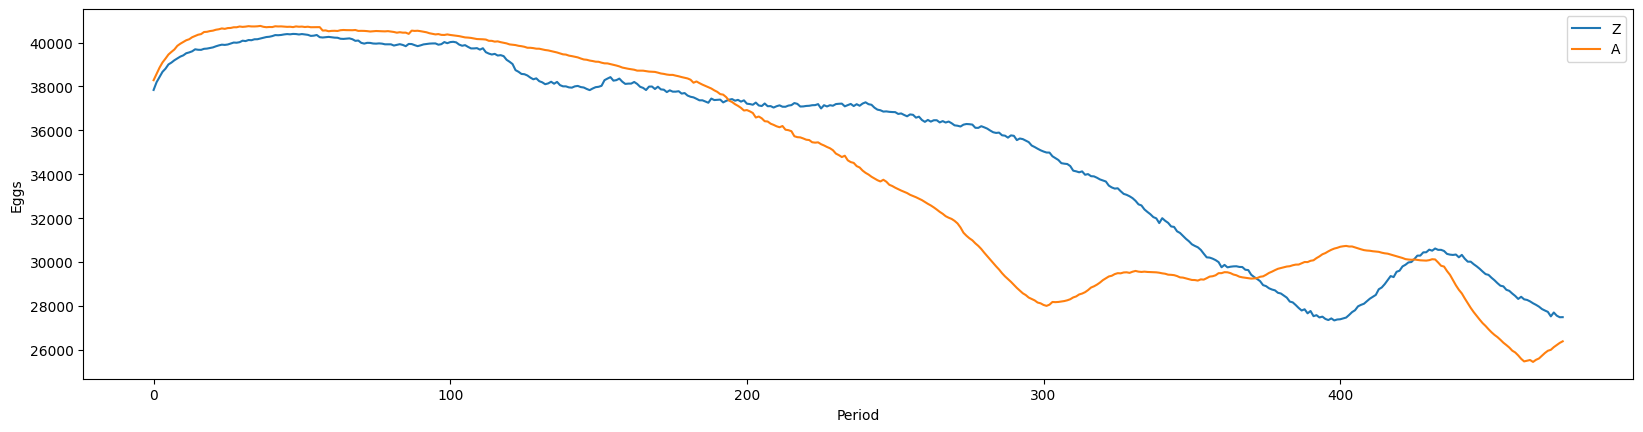

In [13]:
cycles_Z_A = []
cycles_Z_A.append(cycleZ)
cycles_Z_A.append(cycleA)

compareDifferentCycles(cycles_Z_A, 'Eggs', ['Z', 'A'])

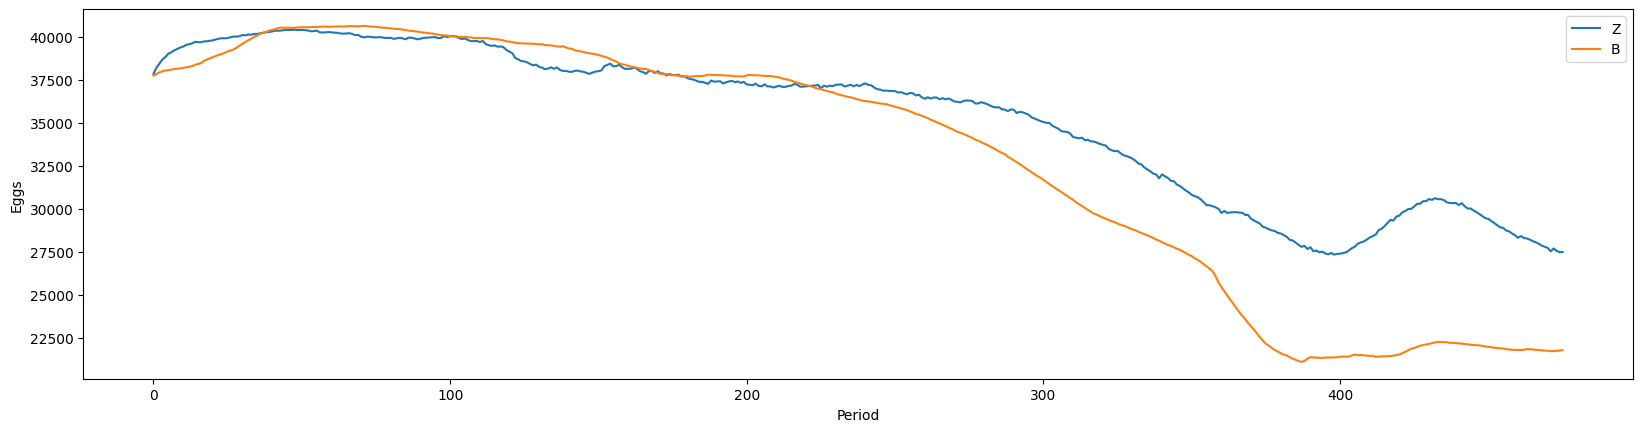

In [14]:
cycles_Z_B = []
cycles_Z_B.append(cycleZ)
cycles_Z_B.append(cycleB)

compareDifferentCycles(cycles_Z_B, 'Eggs', ['Z', 'B'])

### Eggs produced difference

In [15]:
z_eggs = cycleZ['Eggs'].sum()
a_eggs = cycleA['Eggs'].sum()
b_eggs = cycleB['Eggs'].sum()

print('Difference between Z and A: ', (z_eggs-a_eggs))
print('Difference between Z and B: ', (z_eggs-b_eggs))

Difference between Z and A:  439554
Difference between Z and B:  1163240


### Earnings difference
The difference on the earnings is caluclated with the actual value of eggs. That's because the difference in the earinings between the three bio cycles is influenced by the price of bio eggs which obviously changes in time.

In [16]:
price_november = 15.63
print('Difference between Z and A: ', price_november*(z_eggs-a_eggs))
print('Difference between Z and B: ', price_november*(z_eggs-b_eggs))

Difference between Z and A:  6870229.0200000005
Difference between Z and B:  18181441.2


### Deaths difference

In [17]:
print('Difference between Z and A: ', (cycleA['Death'].sum() - cycleZ['Death'].sum()))
print('Difference between Z and B: ', (cycleB['Death'].sum() - cycleZ['Death'].sum()))

Difference between Z and A:  3141
Difference between Z and B:  4822


## Results

We can see that by starting the cycle in winter we could have two benefits:
- Chickens suffer less because the death rate is lower
- The income produced is maximised